# Лабораторная работа №1

## Ширяева Ольга, 4 курс, 3 группа

1.Построение морфологического скелета

Разработать программу построения морфологического скелета изображения и восстановления изображения по морфологическому скелету для бинарных изображений и различных (произвольных) структурирующих элементов.

 

Алгоритмы построения скелета и восстановления изображения - на стр. 19 первой части спецкурса (ссылка в описании курса).

 

В качестве исходных данных можно брать встроенные изображения из модуля skimage.data. Например:

  from skimage import data

  image = data.horse()

 

Для операций с бинарными изображениями рекомендуется использовать функции binary_dilation, binary_erosion, logical_and/or/xor из библиотек numpy и skimage.morphology.

In [5]:
import numpy as np
from skimage.morphology import binary_dilation, binary_erosion
from skimage.morphology.selem import rectangle, disk, diamond
from skimage import data, io
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

%matplotlib inline

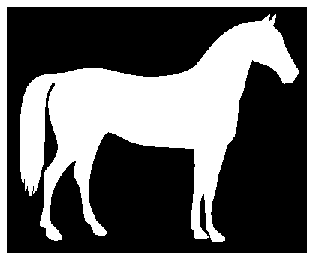

In [6]:
def plot_image(image):
    io.imshow(image)
    plt.axis('off')
    plt.show()

    
data = data.horse()
data = np.invert(data)
plot_image(data)

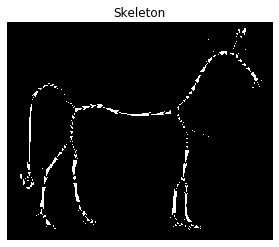

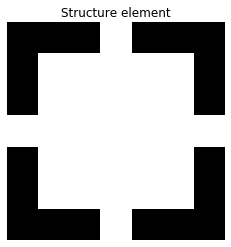

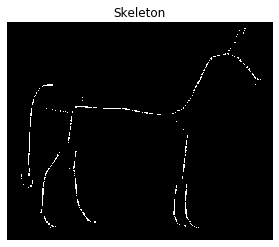

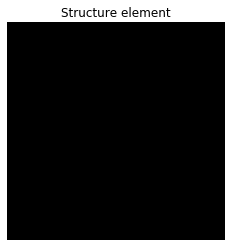

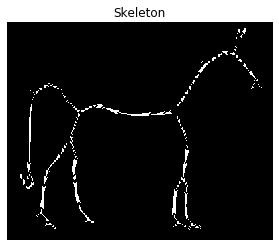

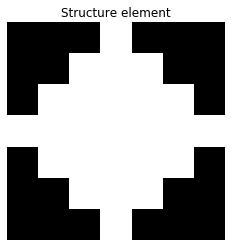

In [7]:
def get_skeleton(x, b): 
    n = 0
    y1 = x.copy()
    y2 = None
    y3 = None
    S = []
    
    while(True):
        y2 = binary_erosion(y1, b)
        if np.all(y2 <= 0):
            S.append(y1)
            break
        y3 = binary_dilation(y2, b)
        S.append(y1 ^ y3)
        y1 = y2
        n = n + 1
        res = np.zeros((len(x[:, 1]), len(x[1, :])))
        
        for step in S:
            res += step
            
    return S, res


def plot_results(y, b):
    plt.imshow(y, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Skeleton')
    plt.show()
    plt.imshow(b, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Structure element')
    plt.show()
    

b1 = disk(3)
b2 = rectangle(3, 3)
b3 = diamond(3)
S1, y1 = get_skeleton(data, b1)
S2, y2 = get_skeleton(data, b2)
S3, y3 = get_skeleton(data, b3)
plot_results(y1, b1)
plot_results(y2, b2)
plot_results(y3, b3)

In [8]:
def restore(steps, structure, x):
    width, height = x.shape[0], x.shape[1]
    res = np.zeros((width, height))
    for i in range(len(steps)):
        res = np.logical_or(res, steps[len(steps) - 1 - i])
        res = binary_dilation(res, selem=structure)
        
    return res

In [ ]:
plot_image(restore(S1, b1, y1))
plot_image(restore(S2, b2, y2))
plot_image(restore(S3, b3, y3))
